In [1]:
import numpy as np
import torch as t
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
tr = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [3]:
train_data = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=tr)
train_loader = t.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_data = datasets.MNIST(root='./MNIST_data', train=False, download=True, transform=tr)
test_loader = t.utils.data.DataLoader(test_data, batch_size=len(test_data), shuffle=True, num_workers=1)

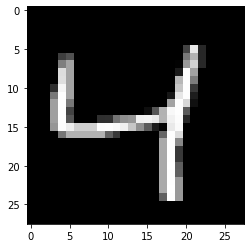

In [4]:
plt.imshow(train_data[2][0].reshape(28, 28), cmap='gray');

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(1, 5, 3, padding=1), 
                                    nn.BatchNorm2d(5), 
                                    nn.ReLU(),
                                    nn.MaxPool2d(3))
        self.layer2 = nn.Sequential(nn.Conv2d(5, 5, 3, padding=1), 
                                    nn.BatchNorm2d(5), 
                                    nn.ReLU(),
                                    nn.MaxPool2d(3))
        self.layer3 = nn.Sequential(nn.Linear(45, 32), 
                                    nn.ReLU())
        self.layer4 = nn.Sequential(nn.Linear(32, 10))

    def forward(self, X):
        X = self.layer1(X)
        X = self.layer2(X)
        X = X.reshape(X.size(0), -1)
        X = self.layer3(X)        
        X = self.layer4(X)
        return X
    
    def evaluate(self, X):
        if len(X.size()) == 3:
            X.unsqueeze(0)
        Y = self.forward(X)
        return t.argmax(Y, dim=1)

In [6]:
net = Net()
params = list(net.parameters())
opt = optim.Adam(params)
criterion = nn.CrossEntropyLoss()

In [7]:
epochs = 3

In [8]:
for i in range(epochs):
    for j, (inputs, labels) in enumerate(train_loader):
        opt.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        opt.step()
        
        if (j + 1) % 100 == 0:
            print("Epoche:", i + 1, "Batch:", j + 1, "Loss:", loss.item())

Epoche: 1 Batch: 100 Loss: 1.5561614036560059
Epoche: 1 Batch: 200 Loss: 0.722811222076416
Epoche: 1 Batch: 300 Loss: 0.48298007249832153
Epoche: 1 Batch: 400 Loss: 0.43023988604545593
Epoche: 1 Batch: 500 Loss: 0.22393092513084412
Epoche: 1 Batch: 600 Loss: 0.21285323798656464
Epoche: 1 Batch: 700 Loss: 0.17493967711925507
Epoche: 1 Batch: 800 Loss: 0.276254802942276
Epoche: 1 Batch: 900 Loss: 0.09695180505514145
Epoche: 2 Batch: 100 Loss: 0.18157798051834106
Epoche: 2 Batch: 200 Loss: 0.15422655642032623
Epoche: 2 Batch: 300 Loss: 0.12359651178121567
Epoche: 2 Batch: 400 Loss: 0.18381859362125397
Epoche: 2 Batch: 500 Loss: 0.2202836275100708
Epoche: 2 Batch: 600 Loss: 0.15951497852802277
Epoche: 2 Batch: 700 Loss: 0.0681302398443222
Epoche: 2 Batch: 800 Loss: 0.11603327840566635
Epoche: 2 Batch: 900 Loss: 0.10991547256708145
Epoche: 3 Batch: 100 Loss: 0.11761859804391861
Epoche: 3 Batch: 200 Loss: 0.13765768706798553
Epoche: 3 Batch: 300 Loss: 0.12563900649547577
Epoche: 3 Batch: 400

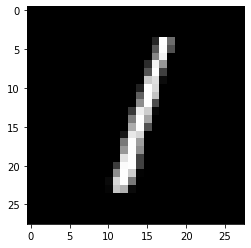

In [9]:
x, y = test_data[2]
plt.imshow(x.reshape(28, 28), cmap='gray');

In [10]:
net.evaluate(x.unsqueeze(0)).item()

1

In [11]:
net.train(False)

Net(
  (layer1): Sequential(
    (0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=45, out_features=32, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=32, out_features=10, bias=True)
  )
)

In [12]:
test_x, test_labels = [(data, target) for data, target in test_loader][0]
predicted_class = net.evaluate(test_x)

(predicted_class == test_labels).float().mean().item()

0.9660999774932861